For a week UK underrreported COVID cases because of a "technical glitch" having to do with Excel. H0: someone/something uses Excel 2003 or at least feeds data with .xls files. https://www.bbc.com/news/uk-54412581

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### SETUP

In [2]:
#https://coronavirus.data.gov.uk/about-data
a = pd.read_csv("https://c19downloads.azureedge.net/downloads/csv/coronavirus-cases_latest.csv")
ut = pd.read_csv("https://opendata.arcgis.com/datasets/46d0cf00f75e4e4d8f5703c1cee283da_0.csv")

In [3]:
rows_limit = 2**16
error_date = datetime.datetime.strptime("2020-09-25", "%Y-%m-%d")

#### PREP DATA

In [32]:
b = a.copy()
b = b[b['Area type'] == "utla"]
b = b[['Area name', 'Area code', 'Specimen date', 'Cumulative lab-confirmed cases']]
b.columns = ['name', 'LAD16CD', 'date', 'cumsum']
b['date'] = pd.to_datetime(b['date'])

b = b.merge(ut, on="LAD16CD")
assert(b['RGN16NM'].isnull().sum() == 0)
b = b[b['RGN16NM'] == "North West"]
b.reset_index(inplace=True, drop=True)
print(b.shape)

(4472, 8)


#### PLOT CUMSUM

In [33]:
nw_cumsum = b.groupby(['date'], as_index=False).agg({'cumsum': 'sum'})

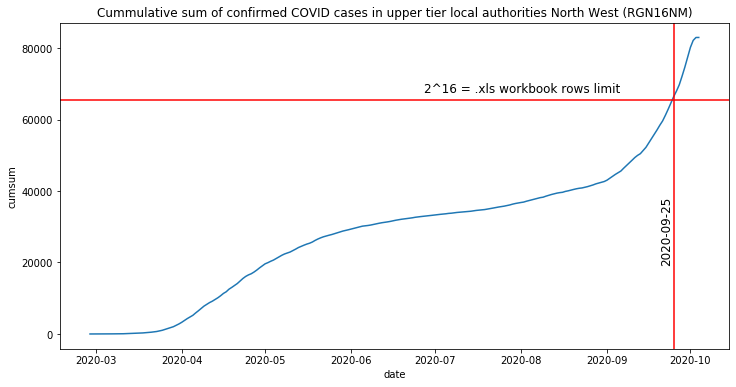

In [58]:
plt.figure(figsize=[12,6])
sns.lineplot(nw_cumsum['date'], nw_cumsum['cumsum'])
plt.axhline(rows_limit, color="red")
plt.axvline(error_date, color="red")
plt.text(error_date + datetime.timedelta(-90), rows_limit + 2000,'2^16 = .xls workbook rows limit', size=12)
plt.text(error_date + datetime.timedelta(-5), 20000,'2020-09-25',rotation=90, size=12)
plt.title("Cummulative sum of confirmed COVID cases in upper tier local authorities North West (RGN16NM)")
plt.show()

In [7]:
82942 - rows_limit

17406